In [67]:
import re
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [19]:
results_dir = Path("results")

path_re = re.compile(
    r".*\\(?P<Replicas>\d)\\(?P<Database>\w+)\\(?P<Workload>\w+)\\(?P<Run>\w+).csv$"
)

df_list: list[pd.DataFrame] = []
for file in results_dir.glob("**\\*.csv"):
    match = path_re.match(str(file))
    assert match is not None

    df = pd.read_csv(file, 
                     skiprows=1 if match.group('Database') == "mongodb" else 0, 
                     names=["Operation", "Metric", "Value"])

    for group, value in match.groupdict().items():
        df[group] = value

    df_list.append(df)
    
df["Metric"]=df["Metric"].str.strip()
df = pd.concat(df_list, ignore_index=True)
df = df.convert_dtypes()
df = df.astype({"Run": "UInt8"})
del df_list
df

,Operation,Metric,Value,Replicas,Database,Workload,Run
0,[OVERALL],RunTime(ms),1827.0,3,mongodb,100_0,1
1,[OVERALL],Throughput(ops/sec),547.345375,3,mongodb,100_0,1
2,[TOTAL_GCS_PS_Scavenge],Count,3.0,3,mongodb,100_0,1
3,[TOTAL_GC_TIME_PS_Scavenge],Time(ms),24.0,3,mongodb,100_0,1
4,[TOTAL_GC_TIME_%_PS_Scavenge],Time(%),1.313629,3,mongodb,100_0,1
...,...,...,...,...,...,...,...
3435,[UPDATE],MinLatency(us),285.0,5,redis,50_50,10
3436,[UPDATE],MaxLatency(us),4223.0,5,redis,50_50,10
3437,[UPDATE],95thPercentileLatency(us),702.0,5,redis,50_50,10
3438,[UPDATE],99thPercentileLatency(us),1454.0,5,redis,50_50,10


In [134]:
df.groupby(["Operation","Metric"]).mean()

C:\Users\pierr\AppData\Local\Temp\ipykernel_19872\4208514822.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["Operation","Metric"]).mean()


Value  Run
Operation                      Metric                                      
[CLEANUP]                      95thPercentileLatency(us)   3235.191667  5.5
                               99thPercentileLatency(us)   3235.191667  5.5
                               AverageLatency(us)             3234.675  5.5
                               MaxLatency(us)              3235.191667  5.5
                               MinLatency(us)              3233.658333  5.5
                               Operations                          1.0  5.5
[OVERALL]                      RunTime(ms)                      2668.1  5.5
                               Throughput(ops/sec)         1355.652948  5.5
[READ]                         95thPercentileLatency(us)   1644.083333  5.5
                               99thPercentileLatency(us)      3986.575  5.5
                               AverageLatency(us)           937.217797  5.5
                               MaxLatency(us)             40198.233333  5.5
                               MinLatency(us)                    326.8  5.5
                               Operations                   534.291667  5.5
                               Return=OK                    534.291667  5.5
[TOTAL_GCS_PS_MarkSweep]       Count                               0.0  5.5
[TOTAL_GCS_PS_Scavenge]        Count                          1.391667  5.5
[TOTAL_GC_TIME]                Time(ms)                      10.008333  5.5
[TOTAL_GC_TIME_%]              Time(%)                        0.309545  5.5
[TOTAL_GC_TIME_%_PS_MarkSweep] Time(%)                             0.0  5.5
[TOTAL_GC_TIME_%_PS_Scavenge]  Time(%)                        0.309545  5.5
[TOTAL_GC_TIME_PS_MarkSweep]   Time(ms)                            0.0  5.5
[TOTAL_GC_TIME_PS_Scavenge]    Time(ms)                      10.008333  5.5
[TOTAL_GCs]                    Count                          1.391667  5.5
[UPDATE]                       95thPercentileLatency(us)       5834.65  5.5
                               99thPercentileLatency(us)     9658.5625  5.5
                               AverageLatency(us)          4011.368801  5.5
                               MaxLatency(us)                  69817.2  5.5
                               MinLatency(us)                2197.5375  5.5
                               Operations                     698.5625  5.5
                               Return=OK                      698.5625  5.5

In [30]:
df["Metric"][0]

'RunTime(ms)'

# Runtime [OVERALL]

In [111]:
run_time=df.loc[(df["Operation"]=="[OVERALL]")& (df["Metric"]=="RunTime(ms)")]

## Workload 100_0

Text(0, 0.5, 'Runtime(ms)')

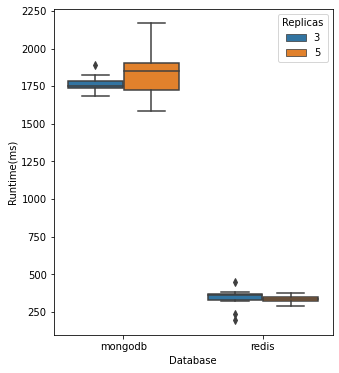

In [93]:
run_time_100_0=run_time[(run_time["Workload"]=="100_0")]
plt.figure(figsize=(5,6))
sns.boxplot(data=run_time_100_0,x='Database', y='Value',  hue='Replicas')
plt.ylabel("Runtime(ms)")

## Workload 50_50

Text(0, 0.5, 'Runtime(ms)')

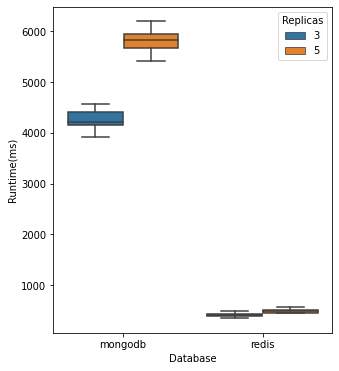

In [110]:
run_time_50_50=run_time[(run_time["Workload"]=="50_50")]
plt.figure(figsize=(5,6))
sns.boxplot(data=run_time_50_50,x='Database', y='Value',  hue='Replicas')
plt.ylabel("Runtime(ms)")

## Workload 10_90

Text(0, 0.5, 'Runtime(ms)')

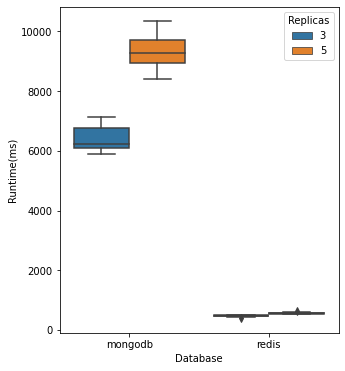

In [149]:
run_time_10_90=run_time[(run_time["Workload"]=="10_90")]
plt.figure(figsize=(5,6))
sns.boxplot(data=run_time_10_90,x='Database', y='Value',  hue='Replicas')
plt.ylabel("Runtime(ms)")

# Throughput(ops/sec) [OVERALL]

In [112]:
throughput=df.loc[(df["Operation"]=="[OVERALL]")& (df["Metric"]=="Throughput(ops/sec)")]

## Workload 100_0

Text(0, 0.5, 'Throughput(ops/sec)')

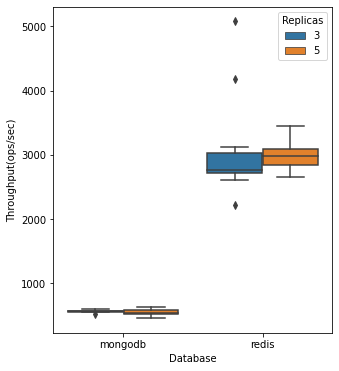

In [122]:
throughput_100_0=throughput[(throughput["Workload"]=="100_0")]
plt.figure(figsize=(5,6))
sns.boxplot(data=throughput_100_0,x='Database', y='Value',  hue='Replicas')
plt.ylabel("Throughput(ops/sec)")

## Workload 50_50

Text(0, 0.5, 'Throughput(ops/sec)')

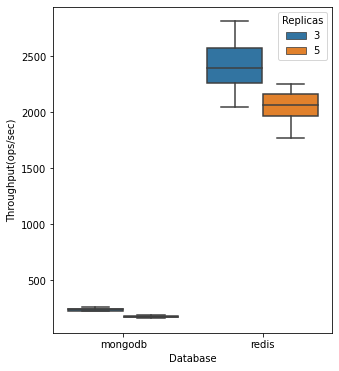

In [126]:
throughput_50_50=throughput[(throughput["Workload"]=="50_50")]
plt.figure(figsize=(5,6))
sns.boxplot(data=throughput_50_50,x='Database', y='Value',  hue='Replicas')
plt.ylabel("Throughput(ops/sec)")

# AverageLatency(us) [UPDATE]

In [137]:
averagelatency=df.loc[(df["Operation"]=="[UPDATE]")& (df["Metric"]=="AverageLatency(us)")]

In [138]:
averagelatency

,Operation,Metric,Value,Replicas,Database,Workload,Run
265,[UPDATE],AverageLatency(us),6672.92436,3,mongodb,10_90,1
296,[UPDATE],AverageLatency(us),5971.70011,3,mongodb,10_90,2
327,[UPDATE],AverageLatency(us),5876.913091,3,mongodb,10_90,3
358,[UPDATE],AverageLatency(us),7109.626697,3,mongodb,10_90,4
389,[UPDATE],AverageLatency(us),6207.932967,3,mongodb,10_90,5
...,...,...,...,...,...,...,...
3310,[UPDATE],AverageLatency(us),537.763916,5,redis,50_50,6
3341,[UPDATE],AverageLatency(us),452.608519,5,redis,50_50,7
3372,[UPDATE],AverageLatency(us),506.496,5,redis,50_50,8
3403,[UPDATE],AverageLatency(us),507.888446,5,redis,50_50,9


## Workload 50_50

Text(0, 0.5, 'AverageLatency(us)')

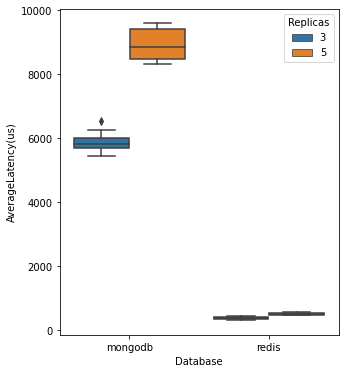

In [142]:
averagelatency_50_50=averagelatency[(averagelatency["Workload"]=="50_50")]
plt.figure(figsize=(5,6))
sns.boxplot(data=averagelatency_50_50,x='Database', y='Value',  hue='Replicas')
plt.ylabel("AverageLatency(us)")

# MinLatency(us) [UPDATE]

In [146]:
minlatency=df.loc[(df["Operation"]=="[UPDATE]")& (df["Metric"]=="MinLatency(us)")]

Text(0, 0.5, 'MinLatency(us)')

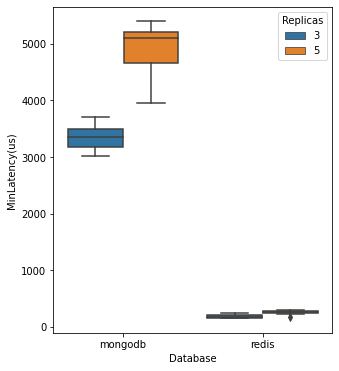

In [148]:
minlatency_50_50=minlatency[(minlatency["Workload"]=="50_50")]
plt.figure(figsize=(5,6))
sns.boxplot(data=minlatency_50_50,x='Database', y='Value',  hue='Replicas')
plt.ylabel("MinLatency(us)")

# AverageLatency(us) [READ]

In [155]:
AverageLatency=df.loc[(df["Operation"]=="[READ]")& (df["Metric"]=="AverageLatency(us)")]

## Workload 100_0

Text(0, 0.5, 'AverageLatency(us)')

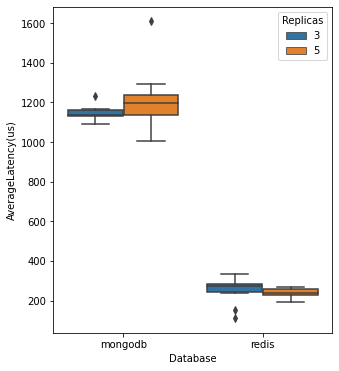

In [158]:
AverageLatency_100_0=AverageLatency[(AverageLatency["Workload"]=="100_0")]
plt.figure(figsize=(5,6))
sns.boxplot(data=AverageLatency_100_0,x='Database', y='Value',  hue='Replicas')
plt.ylabel("AverageLatency(us)")